# Plots: heatmaps

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils
import glob

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
mpl.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Palettes
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set2_8

In [2]:
path_data = "..\\data\\processed\\summary\\"
path_meta = "..\\data\\original\\metadata\\"
path_res = "..\\results\\by_bdg\\"
path_fig = "..\\figures\\"

In [3]:
ref = {0:"Good fit", 
1:"A1", 
2:"A2", 
3:"A3", 
4:"A4", 
5:"B1",
6:"B2",
7:"B3",
8:"B4",
9:"C1",
10:"C2",
11:"C3",
12:"C4",
13:"D1",
14:"D2",
15:"D3",
16:"D4",
17:"Undefined"}

In [4]:
color_ref = {0:"silver",
1:"firebrick", 
2:"salmon",
3:"darkorange",
4:"sandybrown", 
5:"darkgreen", 
6:"limegreen", 
7:"yellowgreen", 
8: "palegreen",
9:"mediumblue", 
10: "royalblue",
11: "dodgerblue",
12: "skyblue",
13:"rebeccapurple", 
14: "mediumorchid",
15: "orchid",
16: "pink",
17:"white"}

In [5]:
#color blind
color_ref = {0:"silver",
1:"#FFBE0B", 
2:"#ffc933",
3:"#ffd35c",
4:"#ffde85", 
5:"#fb5607", 
6:"#fc7536", 
7:"#fd905e", 
8: "#fdac86",
9:"#3A86FF", 
10: "#70A7FF",
11: "#99C0FF",
12: "#C2D9FF",
13:"#8338EC", 
14: "#a26af1",
15: "#B98FF5",
16: "#d1b4f8",
17:"white"}

In [4]:
#color blind
color_ref = {0:"silver",
1:plt.cm.tab20(6), 
2:plt.cm.tab20(7),
3:plt.cm.tab20(2),
4:plt.cm.tab20(3), 
5:plt.cm.tab20(4), 
6:plt.cm.tab20(5), 
7:plt.cm.tab20(16), 
8:plt.cm.tab20(17),
9:plt.cm.tab20(0), 
10:plt.cm.tab20(1),
11:plt.cm.tab20(18),
12:plt.cm.tab20(19),
13:plt.cm.tab20(8), 
14:plt.cm.tab20(9),
15:plt.cm.tab20(12),
16:plt.cm.tab20(13),
17:"white"}

In [5]:
cmap = [color_ref[0],
color_ref[1], 
color_ref[2],
color_ref[3],
color_ref[4], 
color_ref[5], 
color_ref[6], 
color_ref[7], 
color_ref[8],
color_ref[9], 
color_ref[10],
color_ref[11],
color_ref[12],
color_ref[13], 
color_ref[14],
color_ref[15],
color_ref[16],
color_ref[17]]

# Functions

In [6]:
def get_sites(path_data, path_meta, meter):
    # Load original data
    df = pd.read_pickle(path_data + f"{meter}_RMSLE.pickle.gz")
    # Merge with metadata
    meta_bdg = pd.read_csv(path_meta + "building_metadata.csv")
    df = pd.merge(df, meta_bdg, how="left", on="building_id")
    # List of buildings and sites
    bdgs = list(df.building_id.unique())
    sites = list(df.site_id.unique())
    print(f"sites: {len(sites)}. Buildings: {len(bdgs)}")

    return sites

In [7]:
def error_df(path_error, meter, error, site):

    error0 = pd.read_csv(path_res + f"{meter}_Z_site{site}.csv")
    df_error = error0.copy()
    df_error = df_error.replace(1,0)

    error2 = pd.read_csv(path_res + f"{meter}_{error}2_site{site}.csv")
    df_error.update(error2)
    df_error = df_error.replace(1,2)

    error3 = pd.read_csv(path_res + f"{meter}_{error}3_site{site}.csv")
    df_error.update(error3)
    df_error = df_error.replace(1,3)

    error4 = pd.read_csv(path_res + f"{meter}_{error}4_site{site}.csv")
    df_error.update(error4)
    df_error = df_error.replace(1,4)

    error1 = pd.read_csv(path_res + f"{meter}_{error}1_site{site}.csv")
    df_error.update(error1)
  

    #df_error = df_error.fillna(0)

    df_error = df_error.apply(pd.to_numeric, errors='coerce')
    df_error.set_index("building_id",inplace=True)
    print(f"Site {site} error's dataframe created.")
    errors_type = df_error.melt().value.unique()
    
    return df_error, errors_type

In [8]:
def choose_palette(errors_type, ref):

    #cmap = Set2_8.mpl_colors # callable
    #cmap = [cmap[7],cmap[6],cmap[4],cmap[3],cmap[1],cmap[2],cmap[0],"white"]#,cmap[5]]
    cmap = ["silver","firebrick", "salmon", "darkorange", "sandybrown", "royalblue", "darkorchid", "darkgreen","limegreen", "yellowgreen","palegreen","white"]

    pal = []
    names = []

    for i in sorted(errors_type):
        # color list
        color = cmap[int(i)]
        pal.append(color)
        # name list
        name = ref[i]
        names.append(name)

    #cmap1 = pal[1:]
    #names1 = names[1:]

    return pal, names

In [9]:
def setSize(rows):
    if rows == 1:
        size = (5,5)
    elif rows == 2:
        size = (5,10)
    elif rows == 3:
        size = (5,15)
    else:
        size = (5,20)
    
    return size

In [10]:
def error_df_all(path_error, meter, site):

    # Good fit
    error0 = pd.read_csv(path_res + f"{meter}_Z_site{site}.csv")
    df_error = error0.copy()
    df_error = df_error.replace(1,0)

    # In range single bdg
    error1 = pd.read_csv(path_res + f"{meter}_A1_site{site}.csv")
    df_error.update(error1)
    df_error = df_error.replace(1,99)

    error2 = pd.read_csv(path_res + f"{meter}_A2_site{site}.csv")
    df_error.update(error2)
    df_error = df_error.replace(1,2)

    error3 = pd.read_csv(path_res + f"{meter}_A3_site{site}.csv")
    df_error.update(error3)
    df_error = df_error.replace(1,3)

    error4 = pd.read_csv(path_res + f"{meter}_A4_site{site}.csv")
    df_error.update(error4)
    df_error = df_error.replace(1,4)

    # in range multiple bdg
    error9 = pd.read_csv(path_res + f"{meter}_C1_site{site}.csv")
    df_error.update(error9)
    df_error = df_error.replace(1,9)

    error10 = pd.read_csv(path_res + f"{meter}_C2_site{site}.csv")
    df_error.update(error10)
    df_error = df_error.replace(1,10)

    error11 = pd.read_csv(path_res + f"{meter}_C3_site{site}.csv")
    df_error.update(error11)
    df_error = df_error.replace(1,11)

    error12 = pd.read_csv(path_res + f"{meter}_C4_site{site}.csv")
    df_error.update(error12)
    df_error = df_error.replace(1,12)

    # Out of range single bdg
    error5 = pd.read_csv(path_res + f"{meter}_B1_site{site}.csv")
    df_error.update(error5)
    df_error = df_error.replace(1,5)

    error6 = pd.read_csv(path_res + f"{meter}_B2_site{site}.csv")
    df_error.update(error6)
    df_error = df_error.replace(1,6)

    error7 = pd.read_csv(path_res + f"{meter}_B3_site{site}.csv")
    df_error.update(error7)
    df_error = df_error.replace(1,7)

    error8 = pd.read_csv(path_res + f"{meter}_B4_site{site}.csv")
    df_error.update(error8)
    df_error = df_error.replace(1,8)

    # Out of range multiple bdg
    error13 = pd.read_csv(path_res + f"{meter}_D1_site{site}.csv")
    df_error.update(error13)
    df_error = df_error.replace(1,13)

    error14 = pd.read_csv(path_res + f"{meter}_D2_site{site}.csv")
    df_error.update(error14)
    df_error = df_error.replace(1,14)

    error15 = pd.read_csv(path_res + f"{meter}_D3_site{site}.csv")
    df_error.update(error15)
    df_error = df_error.replace(1,15)

    error16 = pd.read_csv(path_res + f"{meter}_D4_site{site}.csv")
    df_error.update(error16)
    df_error = df_error.replace(1,16)

    df_error = df_error.replace(99,1)

    # Undefined
    df_error = df_error.fillna(17)

    df_error = df_error.apply(pd.to_numeric, errors='coerce')
    df_error.set_index("building_id",inplace=True)
    print(f"Site {site} error's dataframe created.")
    errors_type = df_error.melt().value.unique()
    
    return df_error, errors_type

# All errors


Meter chilledwater
Site 0 not available for chilledwater.
Site 1 not available for chilledwater.
Site 2 not available for chilledwater.
Site 3 not available for chilledwater.
Site 4 not available for chilledwater.
Site 5 not available for chilledwater.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 not available for chilledwater.
Site 9 error's dataframe created.
Site 10 error's dataframe created.
Site 11 error's dataframe created.
Site 12 not available for chilledwater.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Site 15 not available for chilledwater.

Meter electricity
Site 0 not available for electricity.
Site 1 not available for electricity.
Site 2 not available for electricity.
Site 3 error's dataframe created.
Site 4 error's dataframe created.
Site 5 error's dataframe created.
Site 6 error's dataframe created.
Site 7 error's dataframe created.
Site 8 error's dataframe created.
Site 9 error's dataframe created.
Site 10 error'

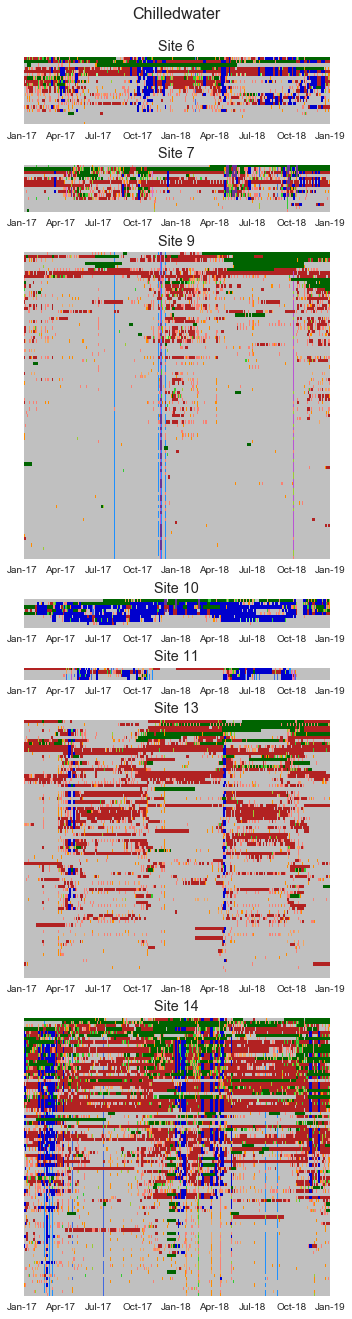

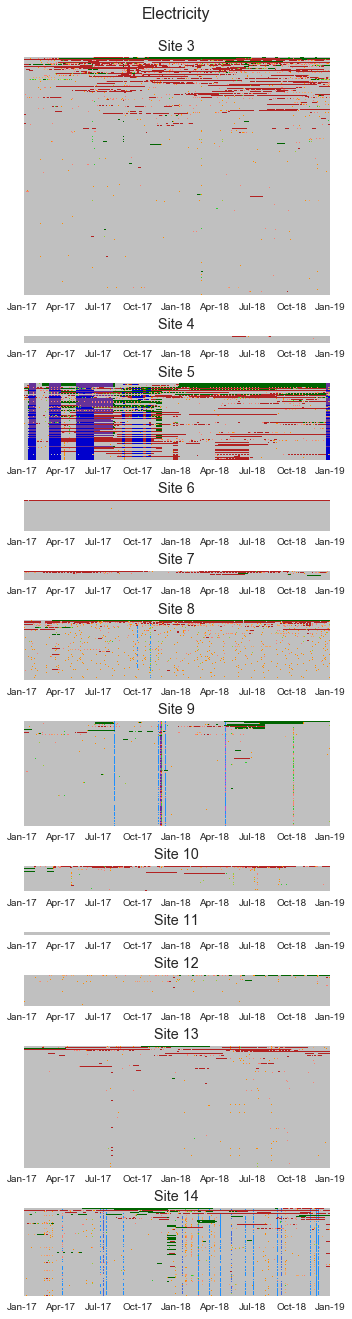

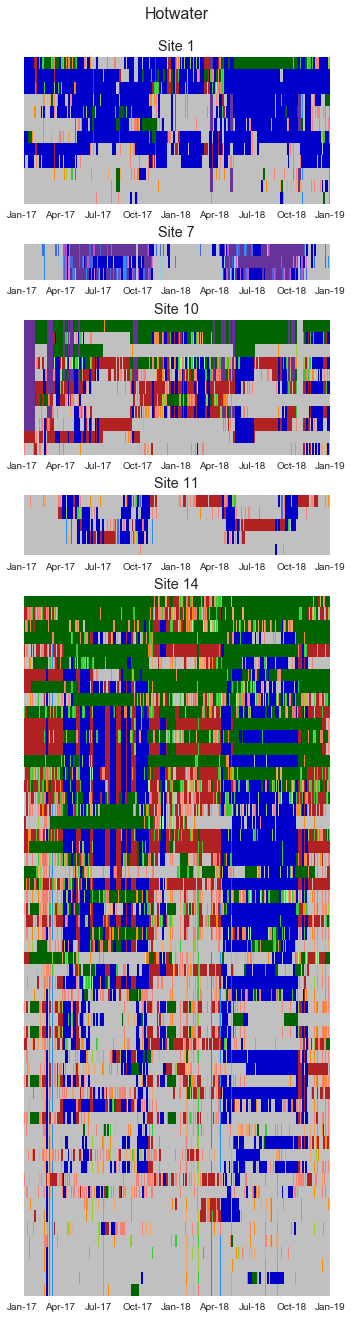

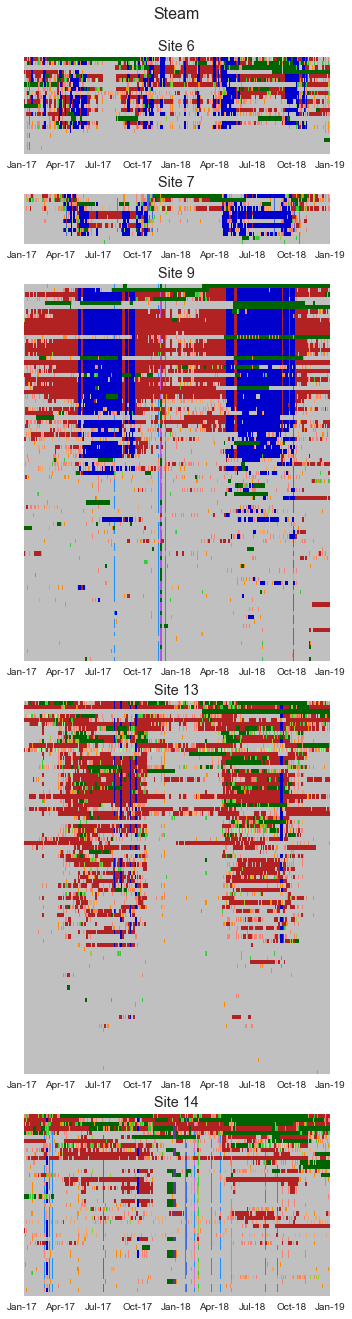

In [30]:
meters = ["chilledwater","electricity","hotwater","steam"]
#meters = ["chilledwater"]
sites = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for meter in meters:
    print(f"\nMeter {meter}")

    df_list = []
    errors_list = []
    sites_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            df_list.append(df_error)
            errors_list.append(error_types)
            sites_list.append(site)

        except:
            print(f"Site {site} not available for {meter}.")

    # Remove sites with only one building
    df_list_filter = []
    sites_list_filter = []
    errors_list_filter = []

    for df,site,error in zip(df_list,sites_list,errors_list):
        if (len(df) > 1):
            df_list_filter.append(df)
            sites_list_filter.append(site)
            errors_list_filter.append(error)

    cols = 1 #2
    rows = len(df_list_filter)

    # Ratios to make height of subplot dependant of number of buldings
    ratios = [len(df) for df in df_list_filter]

    # Size of figure dependant on number of plots
    figsize = setSize(rows)

    fig, axes = plt.subplots(rows, cols, sharex = False, sharey=False, figsize=figsize, gridspec_kw = {"height_ratios": ratios})#, "width_ratios": [4,1]})
    plots = rows * cols
    axes = axes.flatten() if plots > 1 else axes

    i = 0
    for df,error,site in zip(df_list_filter, errors_list_filter, sites_list_filter):

        # Color palettes
        errors = sorted(error)
        #cmap0 = ListedColormap(cmap)
        #cmap1, names1 = choose_palette(error,ref)

        ## HEATMAP
        # Get the data
        y = np.linspace(0, len(df), len(df)+1)
        x = pd.date_range(start='2017-01-01', end='2019-01-01')
        data = df
        cmap_new = ListedColormap(cmap)
        # Plot
        ax0 = axes[i] if plots>1 else axes
        qmesh = ax0.pcolormesh(x, y, data, cmap=cmap_new, rasterized=True, vmin=0, vmax=17)
        # Axis
        plt.locator_params(axis='y', nbins=len(list(data.index))+1)
        ax0.set_title(f"Site {site}")
        ax0.axis('tight') 
        ax0.xaxis_date() # Set up as dates
        ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) # set date's format
        ax0.set_yticklabels("") # omit building ID on y axis

        i = i+1    

    # Figure parameters
    fig.suptitle(f"{meter.capitalize()}", y = 1.015, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)

    fig.savefig(path_fig + f"{meter}_allErrors.pdf", dpi=150, bbox_inches="tight")
    fig.savefig(path_fig + f"{meter}_allErrors.png", dpi=150, bbox_inches="tight")

# Plots by meter

In [11]:
meters = ["electricity","chilledwater","hotwater","steam"]
#meters = ["chilledwater"]
sites = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#error_name = "B"

for meter in meters:
    print(f"\nMeter {meter}")

    df_list = []
    errors_list = []
    sites_list = []

    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            df_list.append(df_error)
            errors_list.append(error_types)
            sites_list.append(site)

        except:
            print(f"Site {site} not available for {meter}.")

    # Remove sites with only one building
    df_list_filter = []
    sites_list_filter = []
    errors_list_filter = []

    for df,site,error in zip(df_list,sites_list,errors_list):
        if (len(df) > 1):
            df_list_filter.append(df)
            sites_list_filter.append(site)
            errors_list_filter.append(error)

    cols = 1 #2
    rows = len(df_list_filter)

    # Ratios to make height of subplot dependant of number of buldings
    ratios = [len(df) for df in df_list_filter]

    # Size of figure dependant on number of plots
    figsize = setSize(rows)

    fig, axes = plt.subplots(rows, cols, sharex = False, sharey=False, figsize=figsize, gridspec_kw = {"height_ratios": ratios})#, "width_ratios": [4,1]})
    plots = rows * cols
    axes = axes.flatten() if plots > 1 else axes

    i = 0
    for df,error,site in zip(df_list_filter, errors_list_filter, sites_list_filter):

        # Color palettes
        errors = sorted(error)
        #cmap0 = ListedColormap(cmap)
        #cmap1, names1 = choose_palette(error,ref)

        ## HEATMAP
        # Get the data
        y = np.linspace(0, len(df), len(df)+1)
        x = pd.date_range(start='2017-01-01', end='2019-01-01')
        data = df
        cmap_new = ListedColormap(cmap)
        # Plot
        ax0 = axes[i] if plots>1 else axes
        qmesh = ax0.pcolormesh(x, y, data, cmap=cmap_new, rasterized=True, vmin=0, vmax=17)
        # Axis
        plt.locator_params(axis='y', nbins=len(list(data.index))+1)
        ax0.set_title(f"Site {site}")
        ax0.axis('tight') 
        ax0.xaxis_date() # Set up as dates
        ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) # set date's format
        ax0.set_yticklabels("") # omit building ID on y axis

        i = i+1    

    # Figure parameters
    fig.suptitle(f"{meter.capitalize()}", y = 1.015, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)

    #fig.savefig(path_fig + f"{meter}_allErrrors.pdf", dpi=150, bbox_inches="tight")
    #fig.savefig(path_fig + f"{meter}_allErrrors.png", dpi=150, bbox_inches="tight")


Meter electricity
Site 0 not available for electricity.
Site 1 not available for electricity.
Site 2 not available for electricity.
Site 3 not available for electricity.
Site 4 not available for electricity.
Site 5 not available for electricity.
Site 6 not available for electricity.
Site 7 not available for electricity.
Site 8 not available for electricity.
Site 9 not available for electricity.
Site 10 not available for electricity.
Site 11 not available for electricity.
Site 12 not available for electricity.
Site 13 not available for electricity.
Site 14 not available for electricity.
Site 15 not available for electricity.

Meter chilledwater
Site 0 not available for chilledwater.
Site 1 not available for chilledwater.
Site 2 not available for chilledwater.
Site 3 not available for chilledwater.
Site 4 not available for chilledwater.
Site 5 not available for chilledwater.
Site 6 not available for chilledwater.
Site 7 not available for chilledwater.
Site 8 not available for chilledwat

<Figure size 360x1440 with 0 Axes>

<Figure size 360x1440 with 0 Axes>

<Figure size 360x1440 with 0 Axes>

<Figure size 360x1440 with 0 Axes>

# Plots by selected sites

In [11]:
def sites_to_plot(meter):

    if (meter == "chilledwater") or (meter == "steam"):
        sites = [9,13,14]
    elif meter == "electricity":
        sites = [5,9,14]
    elif meter == "hotwater":
        sites = [1,10,14]
    
    return sites


Meter electricity
Site 5 error's dataframe created.
Site 9 error's dataframe created.
Site 14 error's dataframe created.
Total bdgs: 313. Ratios: [0.59, 0.81, 0.68]. Fig height: 11.69

Meter chilledwater
Site 9 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Total bdgs: 261. Ratios: [0.63, 0.53, 0.57]. Fig height: 9.74

Meter hotwater
Site 1 error's dataframe created.
Site 10 error's dataframe created.
Site 14 error's dataframe created.
Total bdgs: 80. Ratios: [0.08, 0.07, 0.38]. Fig height: 2.99

Meter steam
Site 9 error's dataframe created.
Site 13 error's dataframe created.
Site 14 error's dataframe created.
Total bdgs: 220. Ratios: [0.59, 0.59, 0.29]. Fig height: 8.21


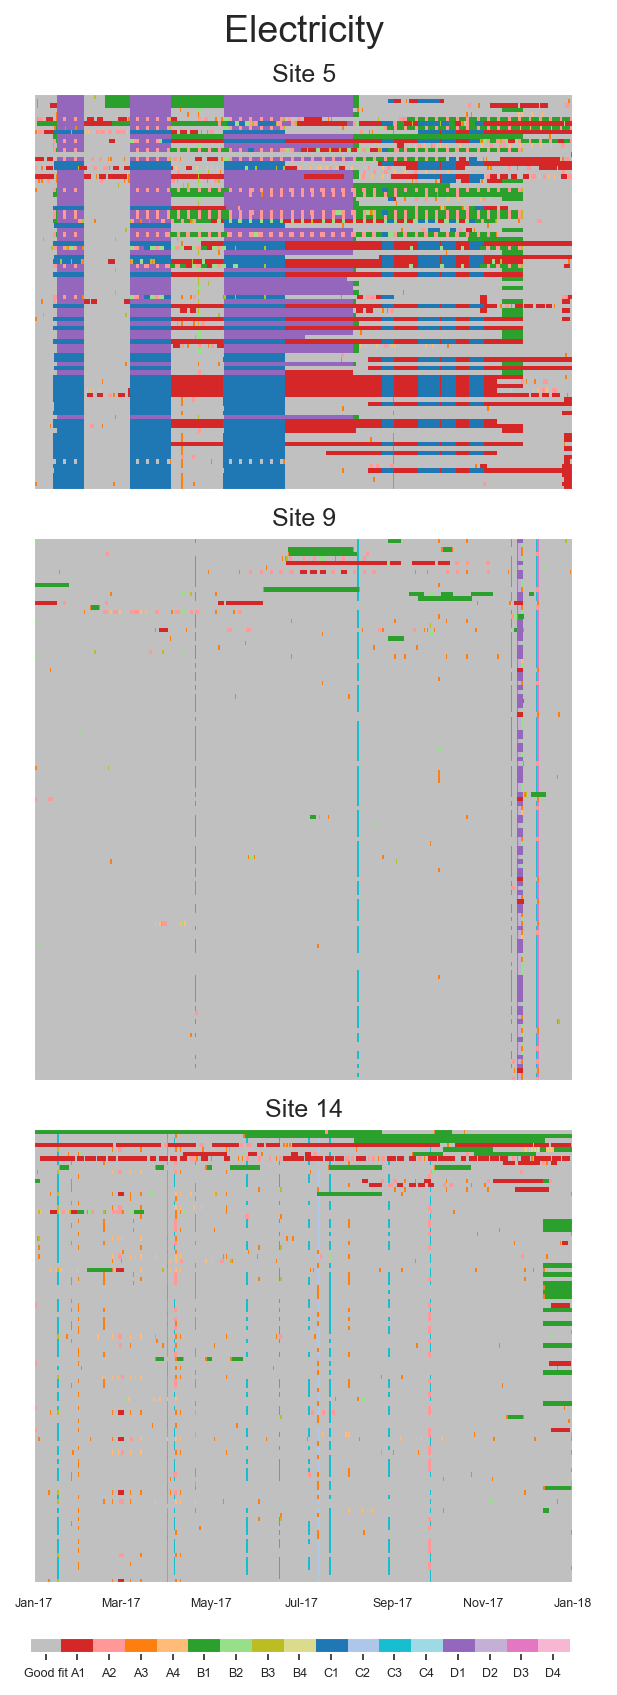

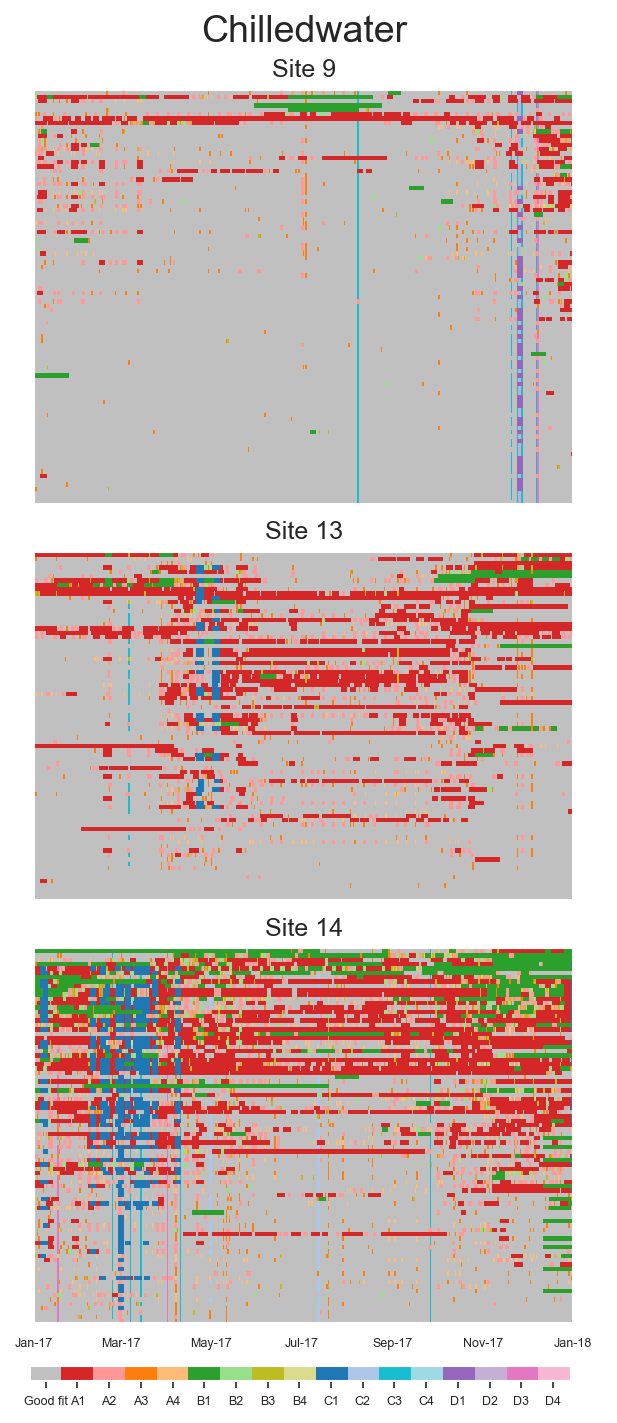

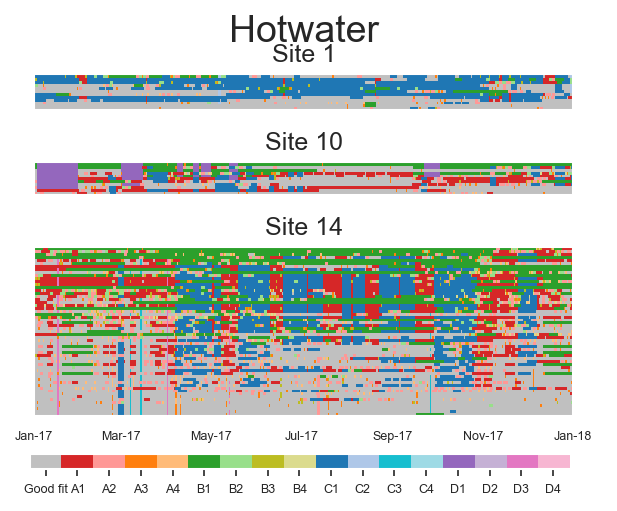

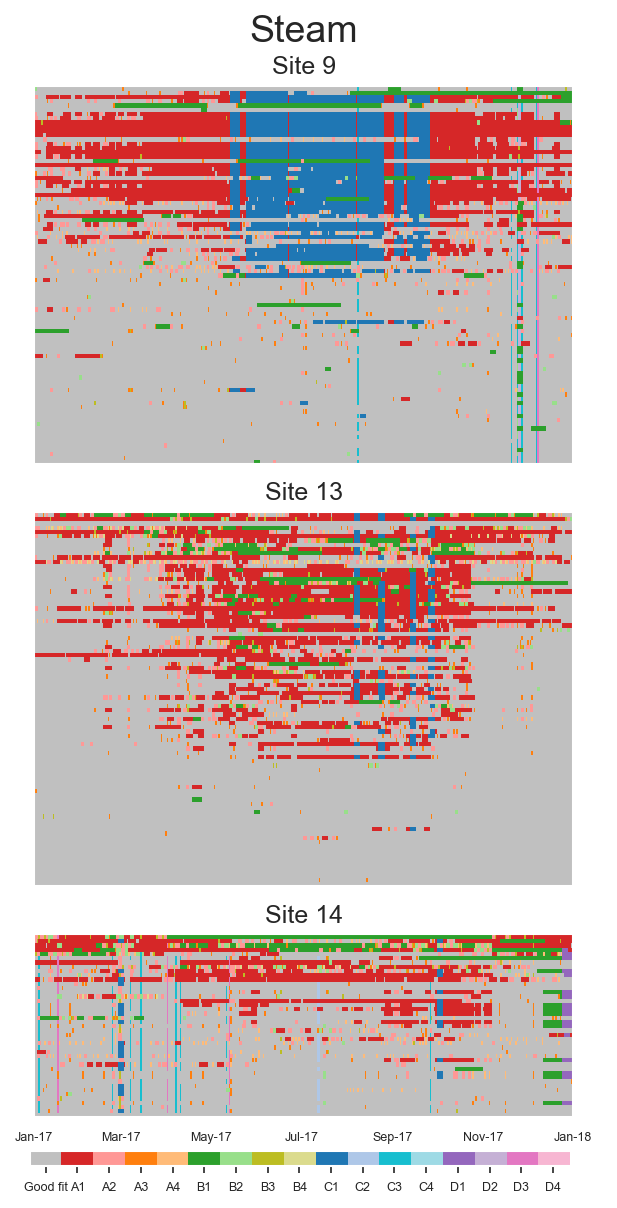

In [13]:
meters = ["electricity","chilledwater","hotwater","steam"]
#meters = ["steam"]
#error_name = "A"

for meter in meters:
    print(f"\nMeter {meter}")

    df_list = []
    errors_list = []
    sites_list = []

    sites = sites_to_plot(meter)
    for site in sites:

        try:
            df_error, error_types = error_df_all(path_res, meter, site)
            df_list.append(df_error)
            errors_list.append(error_types)
            sites_list.append(site)

        except:
            print(f"Site {site} not available for {meter}.")

    # Remove sites with only one building
    df_list_filter = []
    errors_list_filter = []

    for df,site,error in zip(df_list,sites_list,errors_list):
        if (len(df) > 1):
            df_list_filter.append(df)
            errors_list_filter.append(error)

    cols = 1 #2
    rows = len(df_list_filter)
    dpi = 150
    squaresize = 5.6
    ratios = [len(df)/dpi for df in df_list_filter]

    total_bdgs = 0
    for j in df_list_filter:
        total_bdgs = total_bdgs + len(j)

    figheight = total_bdgs*squaresize/float(dpi) # max 11.7 inches
    print(f"Total bdgs: {total_bdgs}. Ratios: {[round(r,2) for r in ratios]}. Fig height: {round(figheight,2)}")

    # Ratios to make height of subplot dependant of number of buldings
    #ratios = [len(df) for df in df_list_filter]

    # Size of figure dependant on number of plots
    #figsize = setSize(rows)

    fig, axes = plt.subplots(rows, cols, sharex = True, sharey=False, figsize=(4.15,figheight), dpi=dpi, gridspec_kw = {"height_ratios": ratios})#, "width_ratios": [4,1]})
    plots = rows * cols
    axes = axes.flatten() if plots > 1 else axes

    i = 0
    for df,error,site in zip(df_list_filter, errors_list_filter, sites):

        # Color palettes
        errors = sorted(error)
        #cmap0 = ListedColormap(cmap)
        #cmap1, names1 = choose_palette(error,ref)

        ## HEATMAP
        # Get the data
        y = np.linspace(0, len(df), len(df)+1)
        x = pd.date_range(start='2017-01-01', end='2019-01-01')
        cmap_new = ListedColormap(cmap)
        data = df
        # Plot
        ax0 = axes[i] if plots>1 else axes
        qmesh = ax0.pcolormesh(x, y, data, cmap=cmap_new, rasterized=True, vmin=0, vmax=17)
        # Axis
        plt.locator_params(axis='y', nbins=len(list(data.index))+1)
        ax0.set_title(f"Site {site}", fontsize=12)
        ax0.axis('tight') 
        ax0.xaxis_date() # Set up as dates
        ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) # set date's format
        #ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right',fontsize=8)
        ax0.set_yticklabels("") # omit building ID on y axis
        ax0.set_xlim([dt.date(2017, 1, 1), dt.date(2018, 1, 1)])
        plt.xticks(rotation=0, fontsize=6)

        i = i+1    

    # Figure parameters
    fig.suptitle(f"{meter.capitalize()}", y = 1.015, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)

    if meter == "hotwater":
        cax = plt.axes([0.06, 0, 0.92,  0.1/figheight])

    else:
        cax = plt.axes([0.06, 0.08, 0.92, 0.1/figheight])

    tick_locs = (np.arange(17) + 0.5)*(17-1)/17
    cbar = plt.colorbar(qmesh,orientation='horizontal',ticks=tick_locs, cax=cax, spacing="proportional")
    cbar.set_ticklabels(list(ref.values())[:-1])
    cbar.ax.tick_params(labelsize=6)

    fig.savefig(path_fig + f"{meter}_allErrors_selectedSites_cb.pdf", dpi=150, bbox_inches="tight")
    fig.savefig(path_fig + f"{meter}_allErrors_selectedSites_cb.png", dpi=150, bbox_inches="tight")